In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from libraries import *
warnings.filterwarnings('ignore')

<h1 style="color: #FF69B4"><i> 1. EDA </i><h1>

<h4 style="color: #FF69B4"> Информация о столбцах: <h4>

<li>name — имя объекта ASCII и номер записи</li>

<li>MDVP:Fo(Hz) — средняя основная частота</li>

<li>MDVP:Fhi(Hz) — максимальная основная частота</li>

<li>MDVP:Flo(Hz) — минимальная основная частота</li>

<li>MDVP:Jitter(%),MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP — несколько показателей изменения основной частоты</li>

<li>MDVP:Shimmer,MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ,Shimmer:DDA - Несколько показателей вариации амплитуды</li>

<li>NHR, HNR - Две меры отношения шума к тональным компонентам в голосовом</li>

<li>статус - Состояние здоровья испытуемого (один) - болезнь Паркинсона, (ноль) - здоровый</li>

<li>RPDE, D2 — две нелинейные меры динамической сложности</li>

<li>DFA — экспонента масштабирования фрактала сигнала</li>

<li>spread1,spread2,PPE — три нелинейные меры изменения основной частоты</li>


In [60]:
park_df = pd.read_csv("C:\\машинное\\данные для обучения\parkinsons.csv")
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [61]:
park_df.columns = park_df.columns.str.replace(":", "_")

In [62]:
# Функция для окрашивания отрицательных и положительных значений
def highlight_less_zero(value):
	color = "black"
	if value < 0:
		color = "red"
	elif value > 0:
		color = "olive"
	return f" color: {color}"
# Датафрейм с окрашенными значениями
diffence_btw_0_1 = (park_df.loc[park_df.status == 1].drop("status", axis=1).describe() \
					.drop("count") - park_df.loc[park_df.status == 0] \
					.drop("status", axis=1).describe().drop("count"))\
					   .style.applymap(highlight_less_zero)

In [63]:
diffence_btw_0_1

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
mean,-36.757009,-35.195287,-38.313734,0.003123,0.000027,0.001832,0.001844,0.005497,0.016043,0.158246,0.008172,0.009776,0.014296,0.024516,0.017728,-3.704702,0.074264,0.029692,1.425844,0.087841,0.301567,0.110811
std,-20.383017,-8.387887,-26.482713,0.003185,0.000022,0.002175,0.002054,0.006524,0.014426,0.149976,0.007341,0.009616,0.014237,0.022023,0.025359,0.904602,0.009055,0.003440,0.328011,0.014827,0.065473,0.039451
min,-22.406000,-11.452000,-8.811000,-0.000100,0.000003,-0.000240,-0.000140,-0.000720,0.000680,0.005000,-0.000130,-0.000360,0.000920,-0.000390,0.001660,-9.442000,0.007084,-0.052428,0.844059,0.057138,0.342670,0.048654
25%,-3.375500,-5.636750,-17.368250,0.001350,0.000020,0.000698,0.000710,0.002087,0.003820,0.039000,0.001785,0.002383,0.004320,0.005340,0.004258,-4.211250,0.066938,0.031277,1.219365,0.078884,0.206716,0.075445
50%,-53.822000,-67.826500,-14.168500,0.002085,0.000015,0.001215,0.001365,0.003655,0.011675,0.109000,0.006065,0.006275,0.008555,0.018180,0.011755,-3.583000,0.095162,0.044125,1.386408,0.073519,0.310087,0.107597
75%,-59.006000,-44.078750,-69.943000,0.003140,0.000030,0.002192,0.002132,0.006575,0.022315,0.205250,0.011303,0.012955,0.018880,0.033915,0.018748,-1.974750,0.096826,0.022583,1.686079,0.109895,0.328992,0.126636
max,-36.744000,-3.512000,-40.150000,0.019560,0.000180,0.015200,0.013940,0.045600,0.078210,0.897000,0.033110,0.054420,0.110330,0.099340,0.207670,-3.119000,0.021309,0.039574,2.764833,0.158539,0.788705,0.274963


In [64]:
percents_of_classes = round(park_df.status.value_counts() / park_df.shape[0], 2)
px.bar(park_df.status.value_counts(), title="Отношение здоровых к заболевшим",
       text=percents_of_classes).update_layout(width=800,
                                               height=600)

In [65]:
if park_df.isna().sum().all() == 0:
    print("Пропущенные значения отсутствуют")
else:
    park_df.isna().sum().plot(kind="barh", color="blue", figsize=(10, 7))

Пропущенные значения отсутствуют


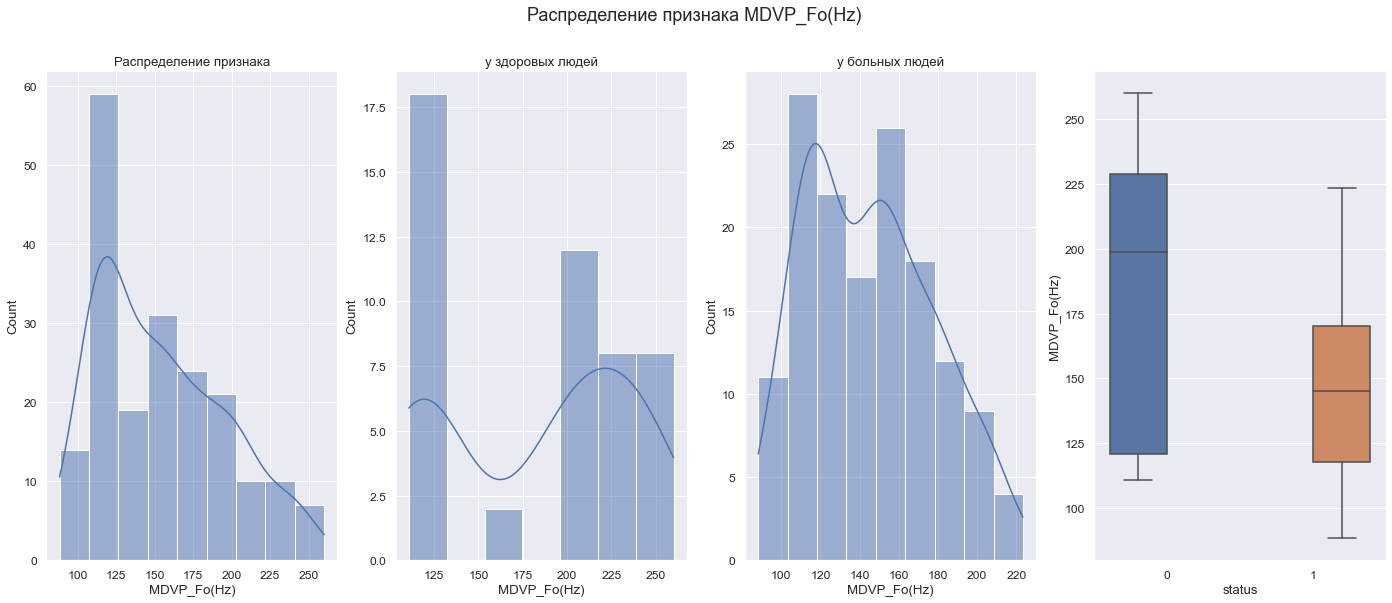

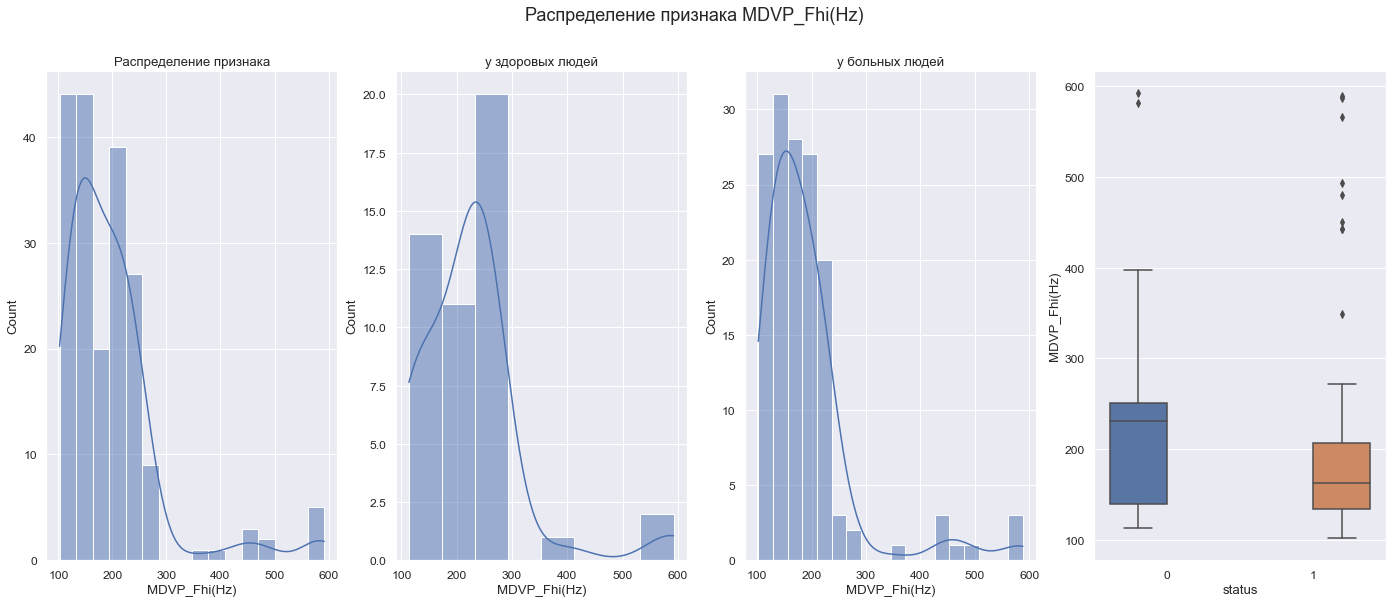

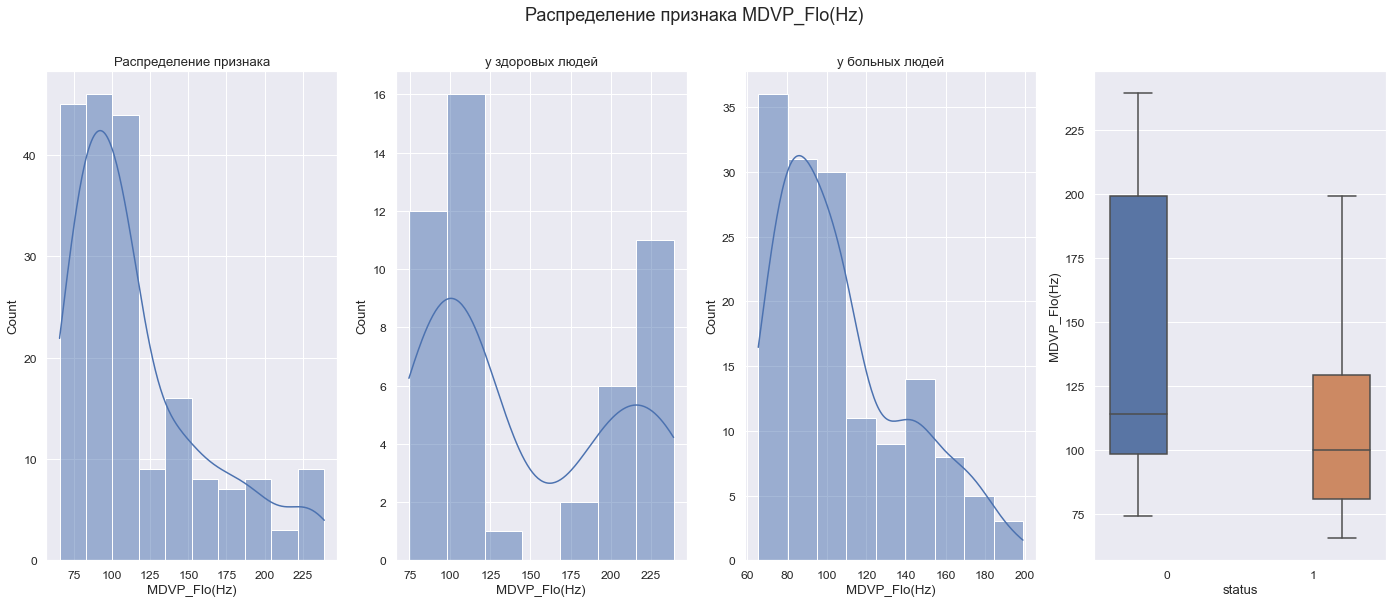

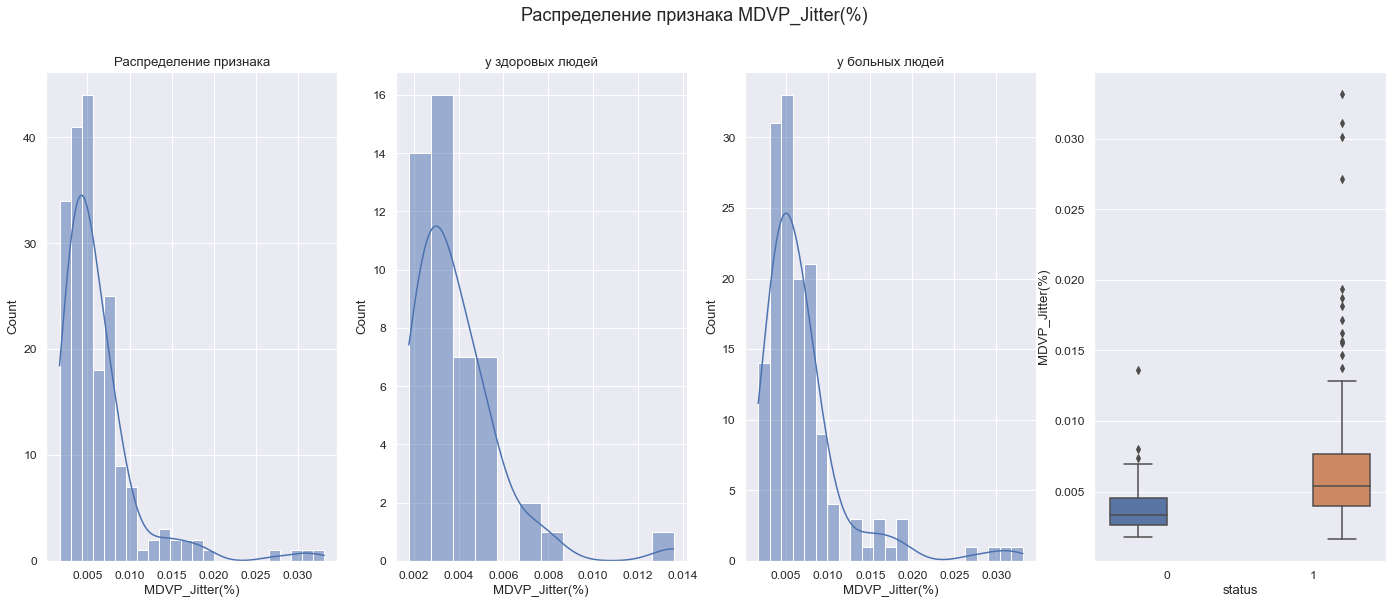

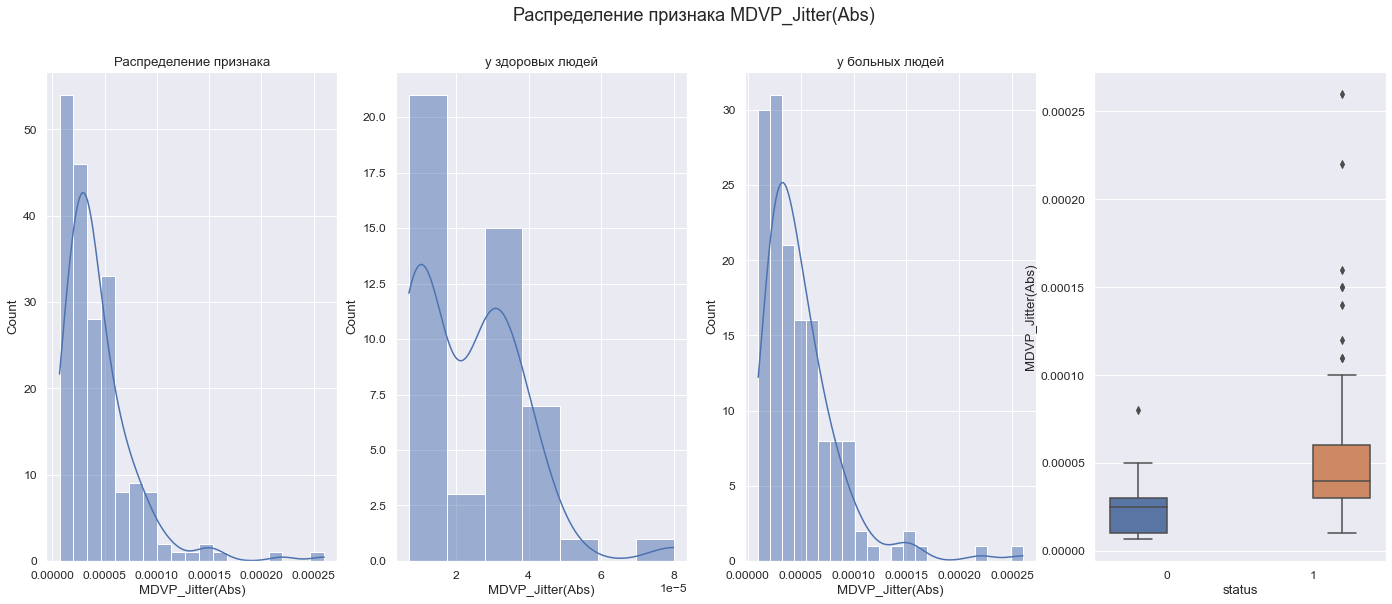

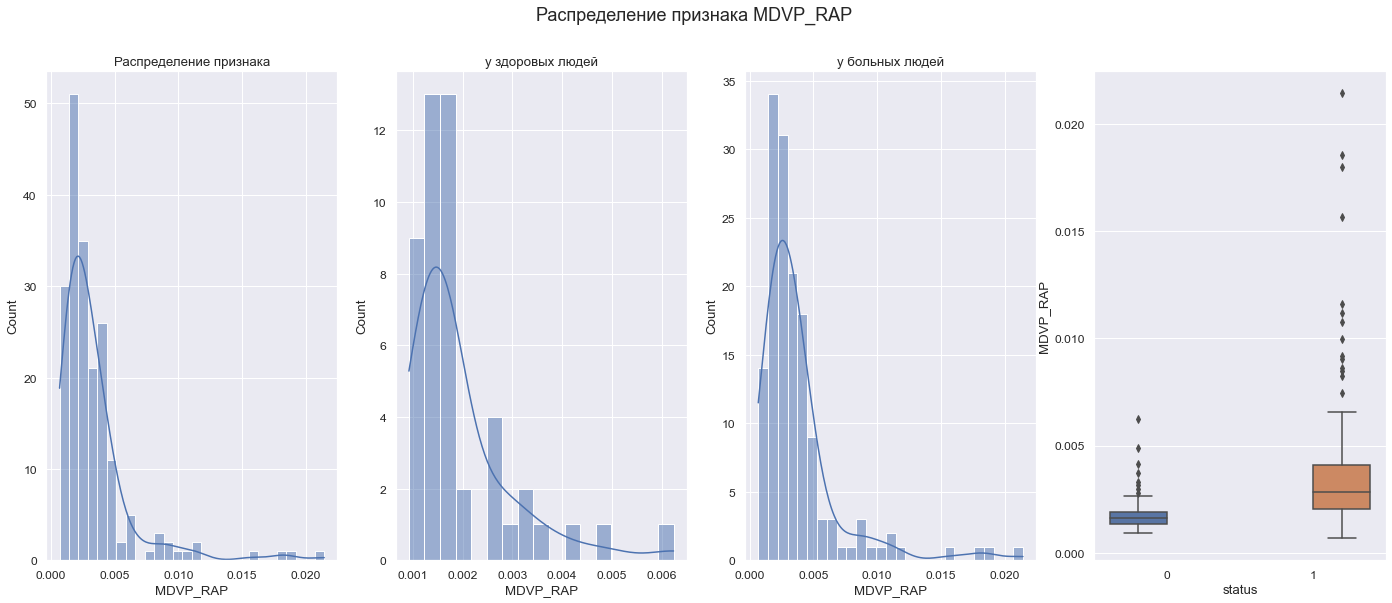

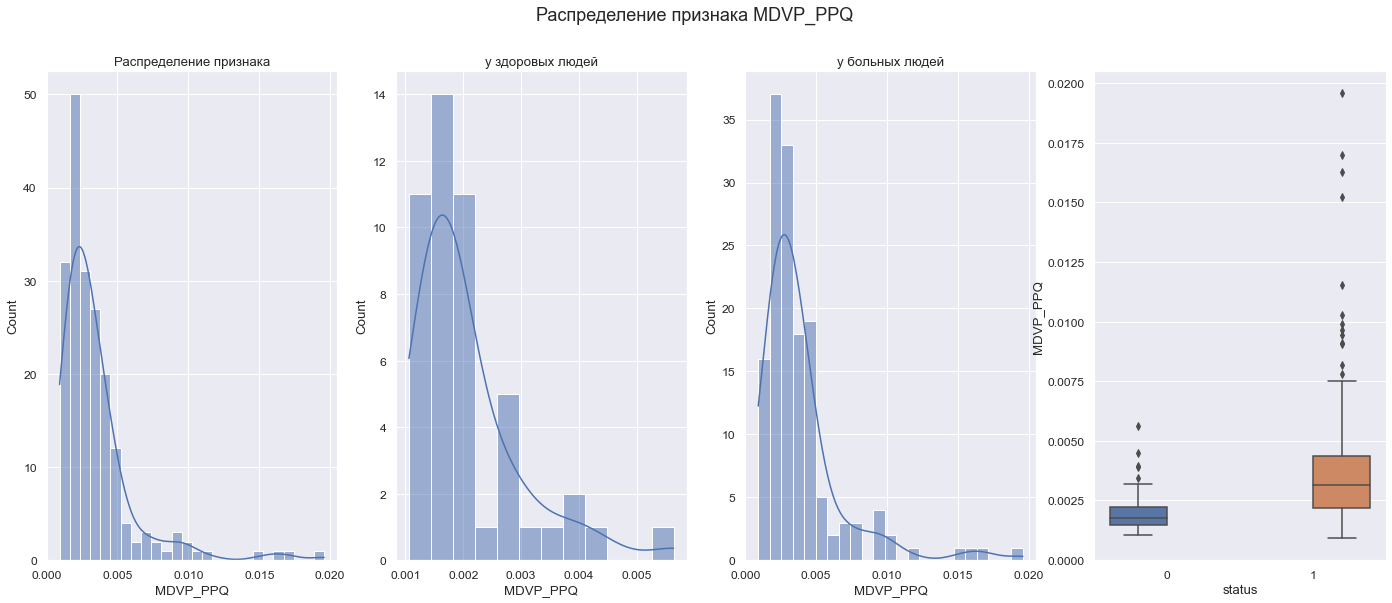

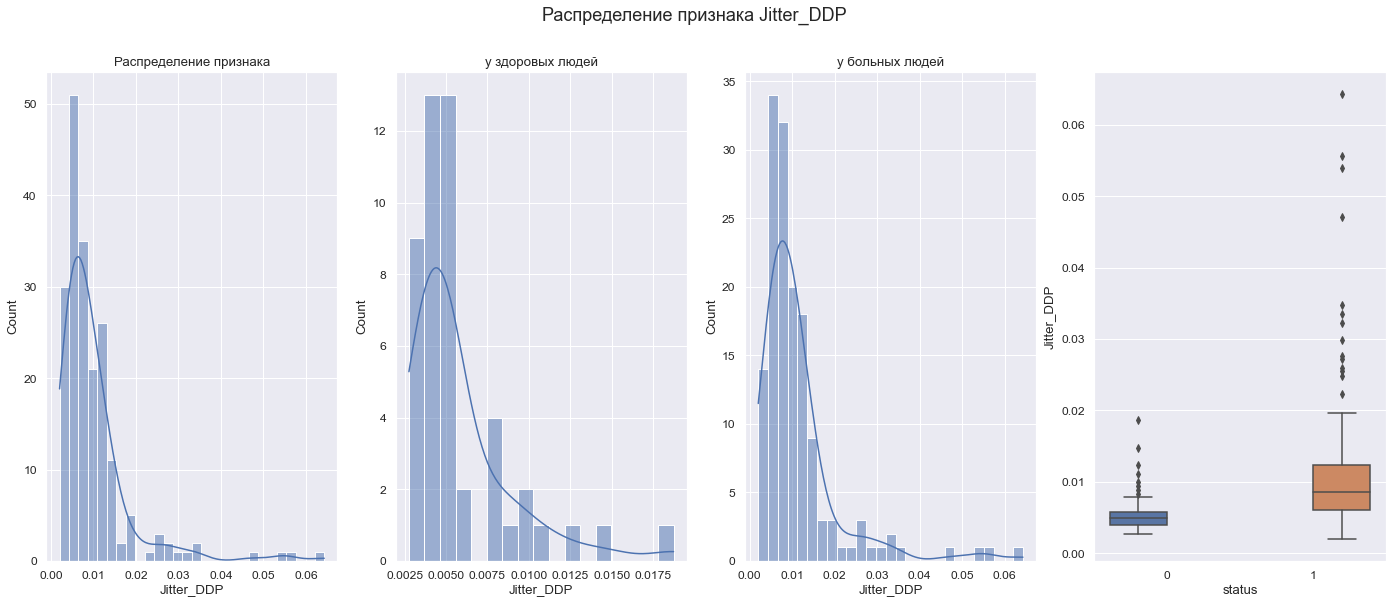

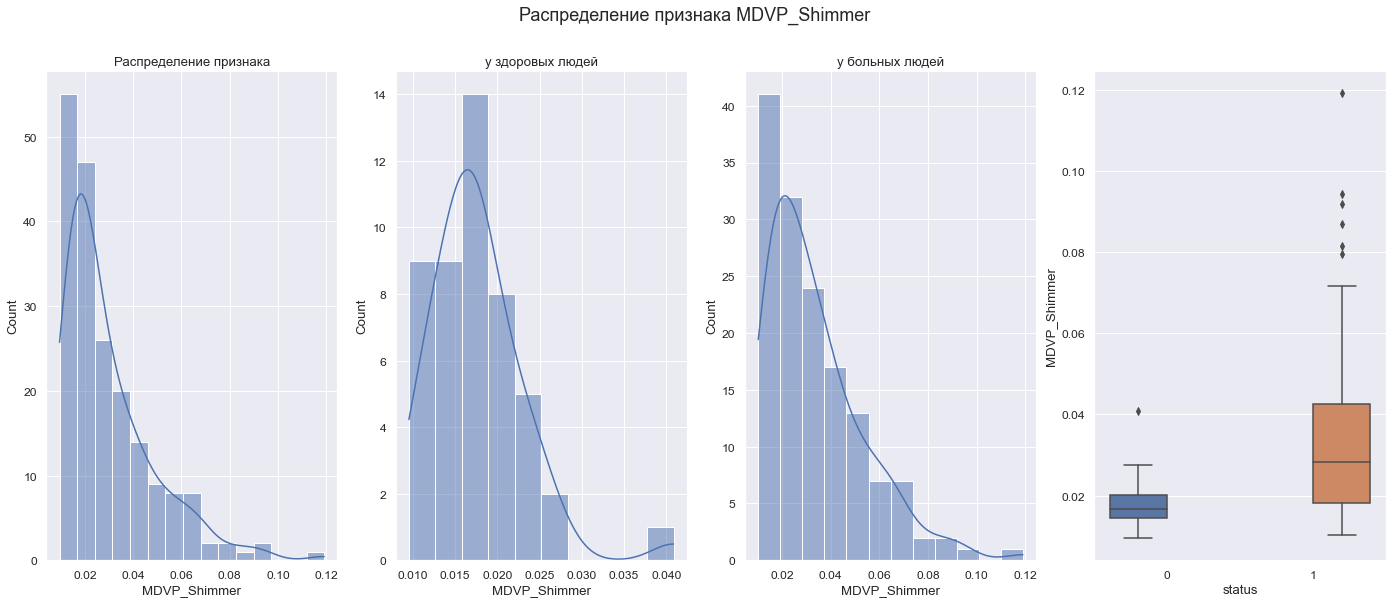

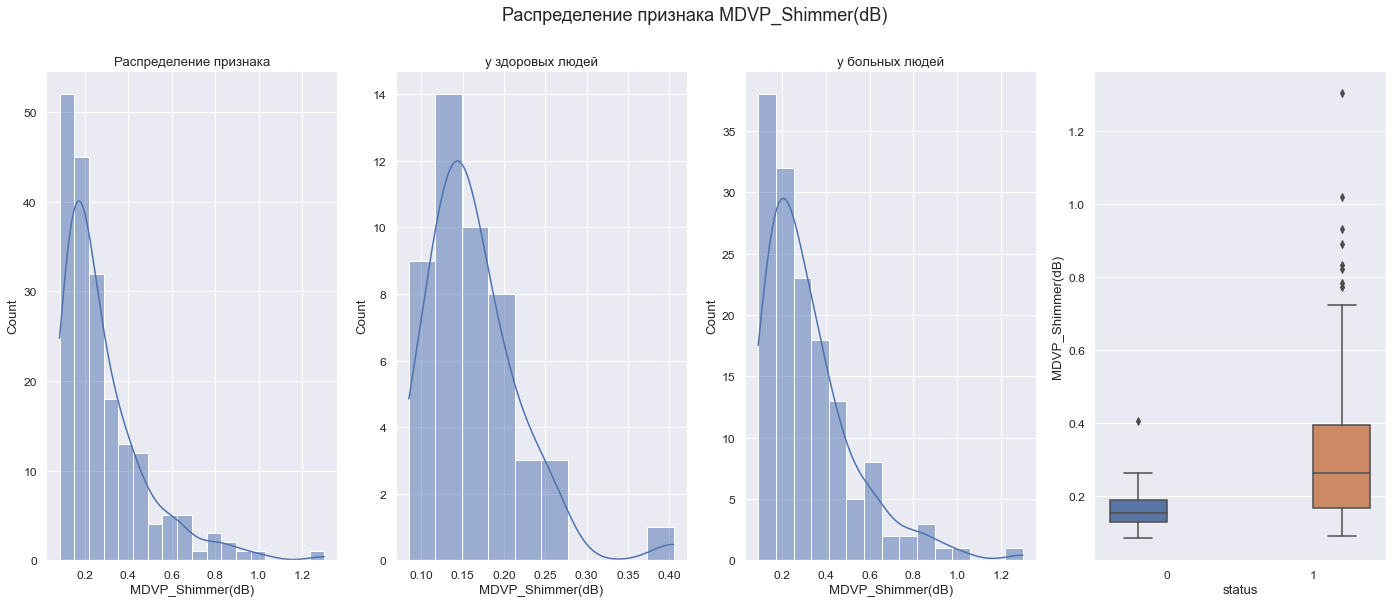

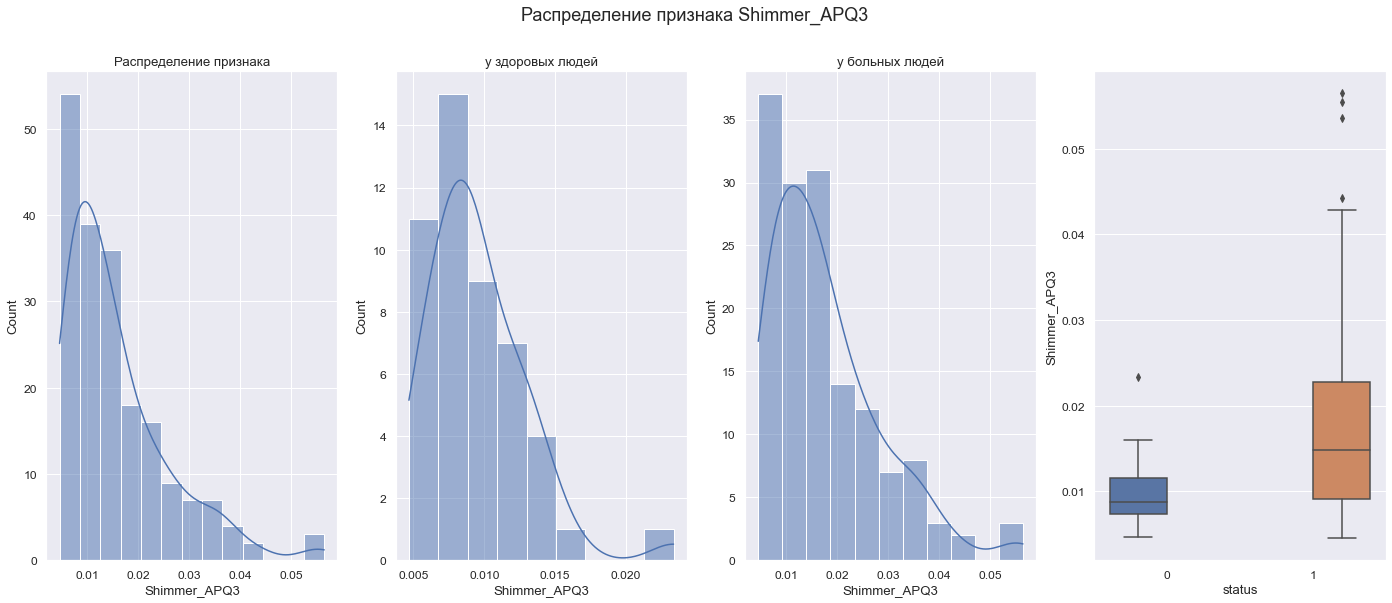

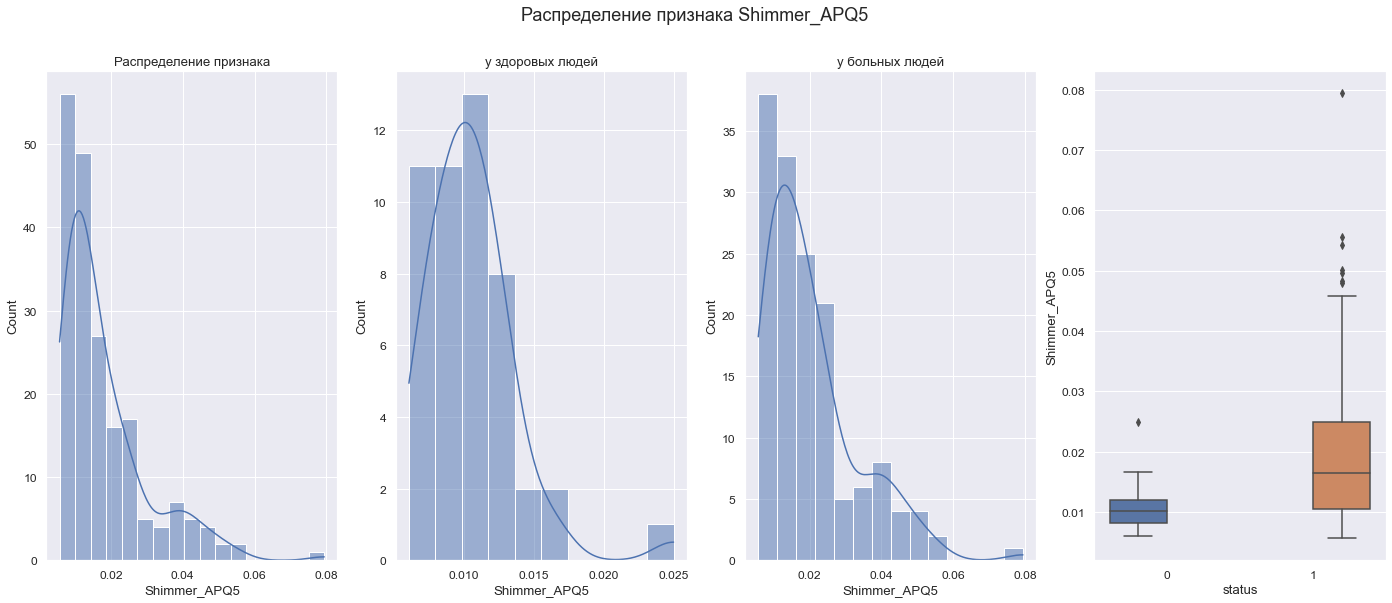

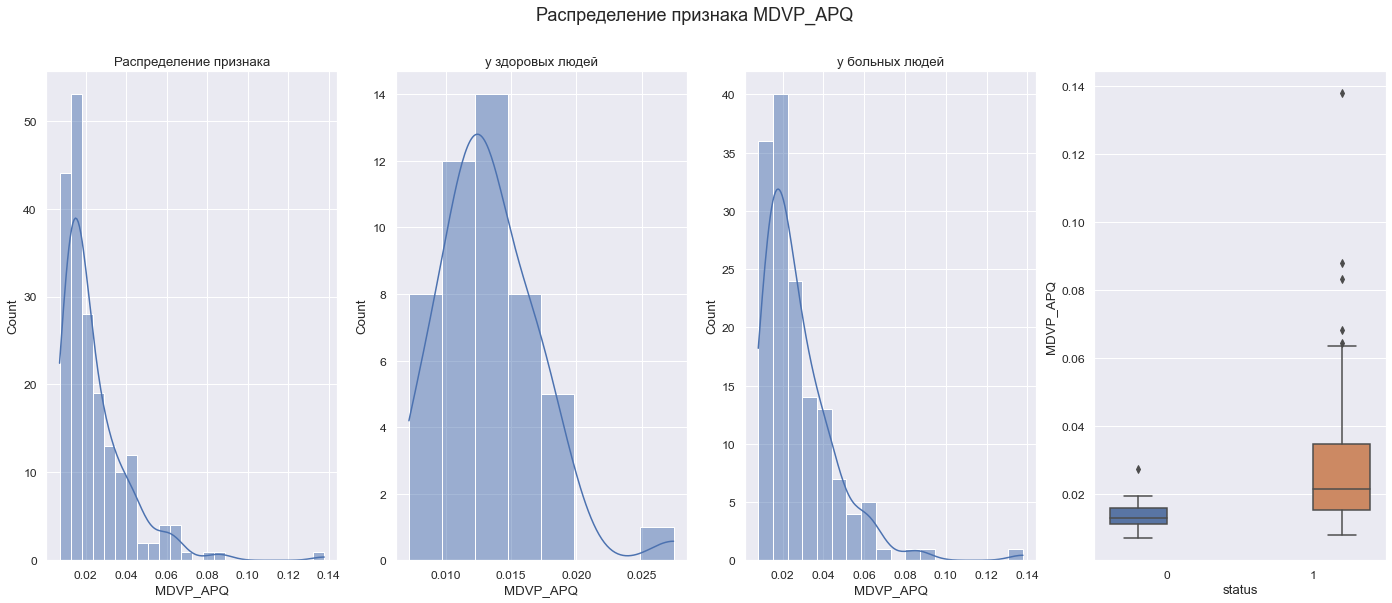

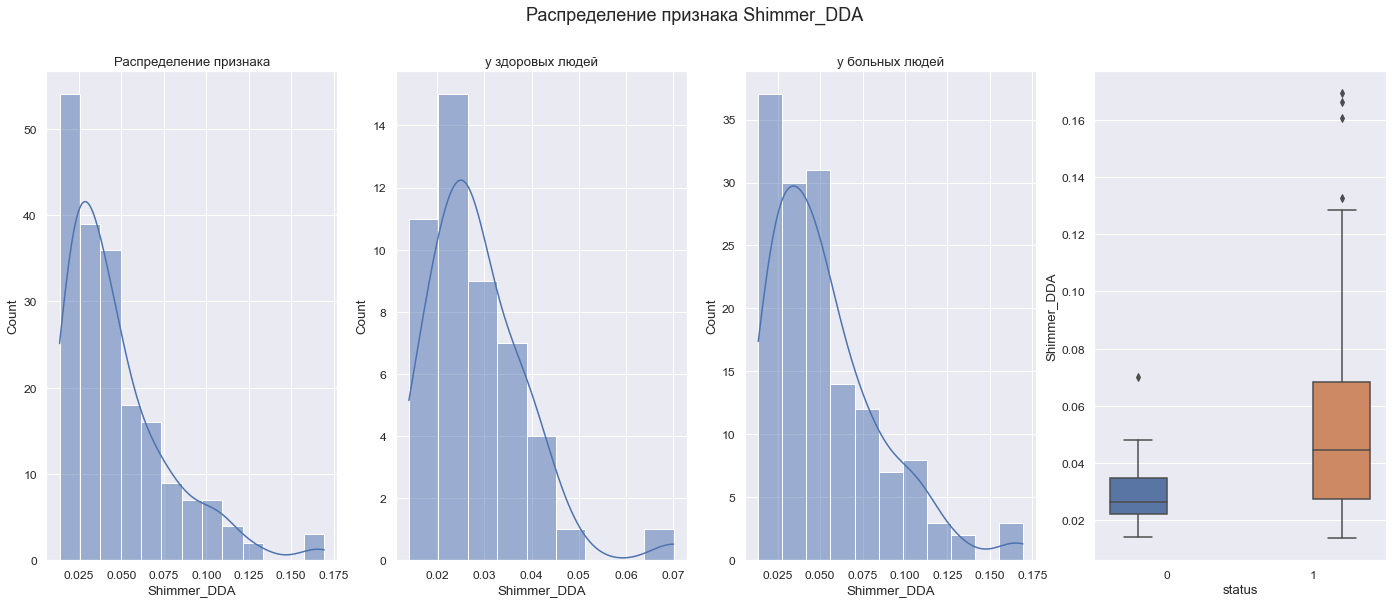

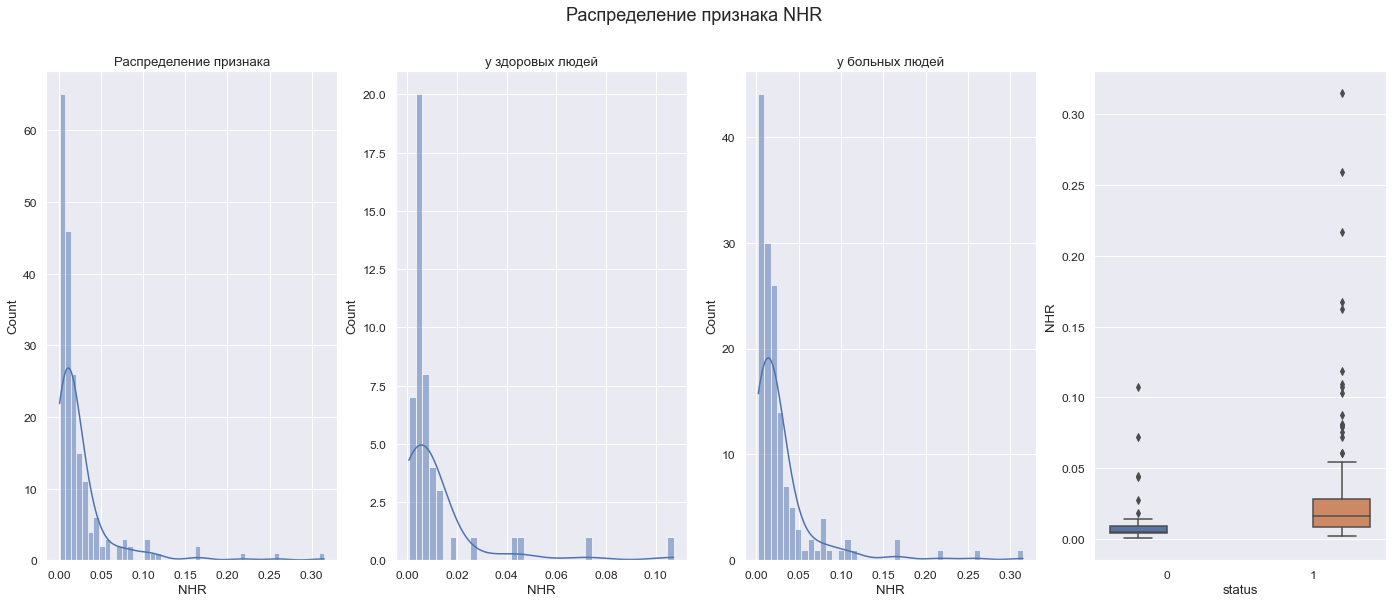

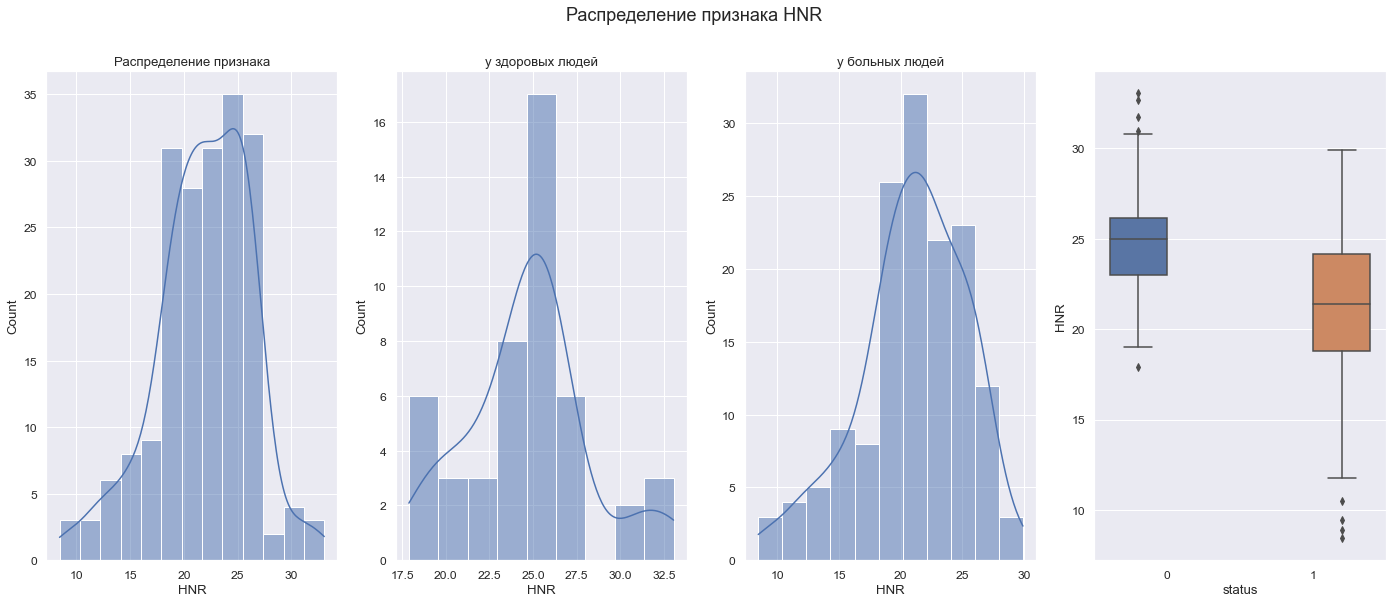

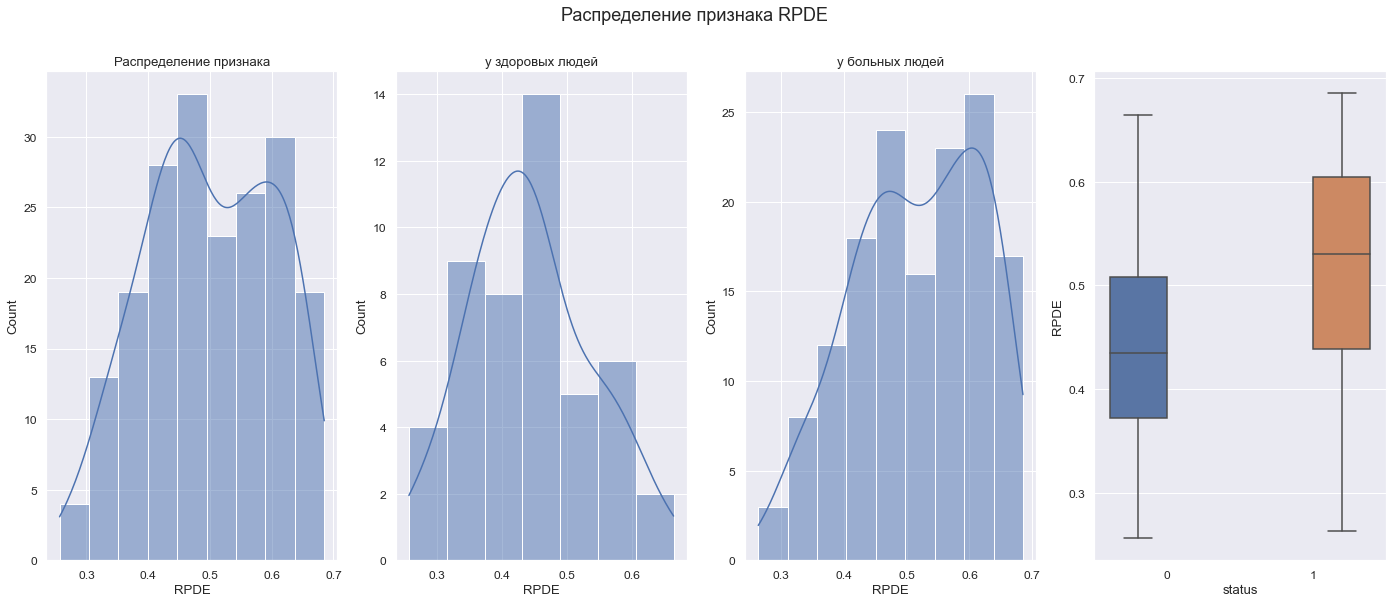

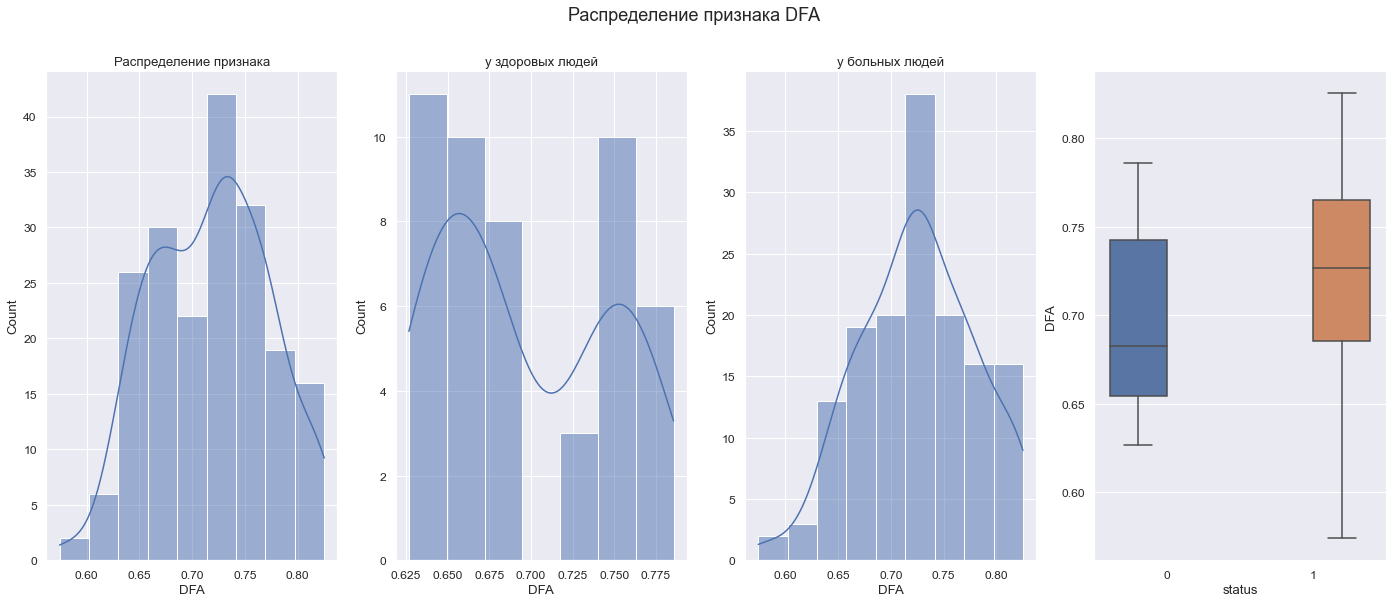

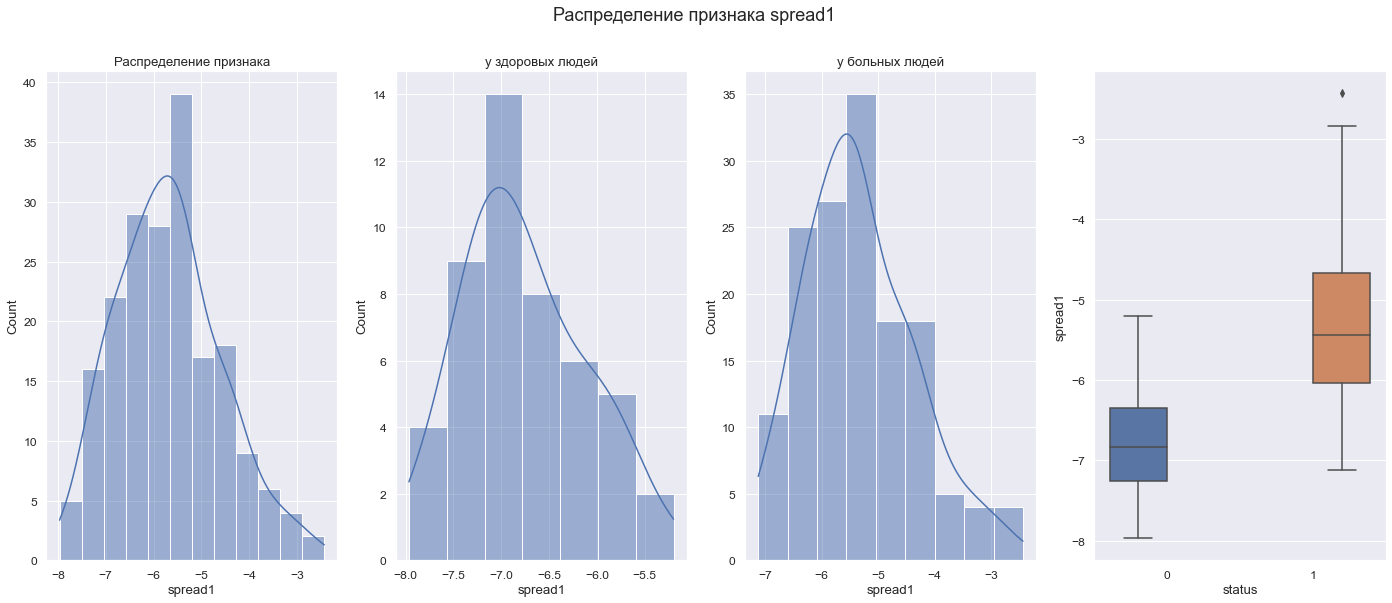

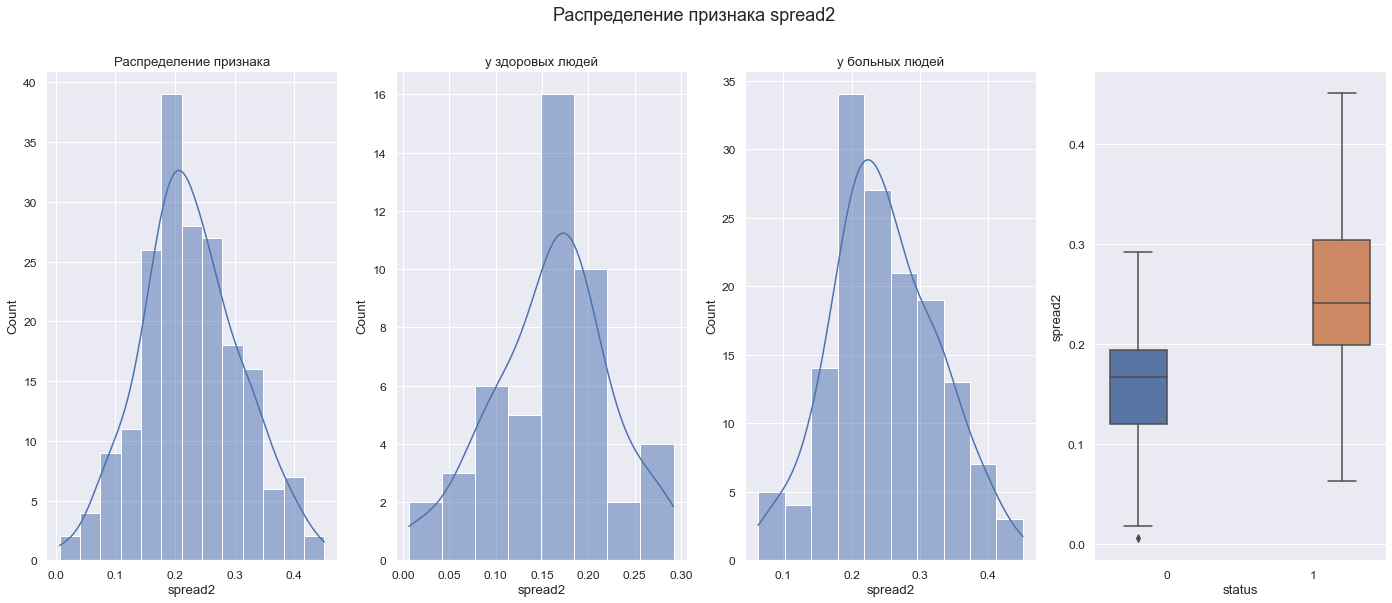

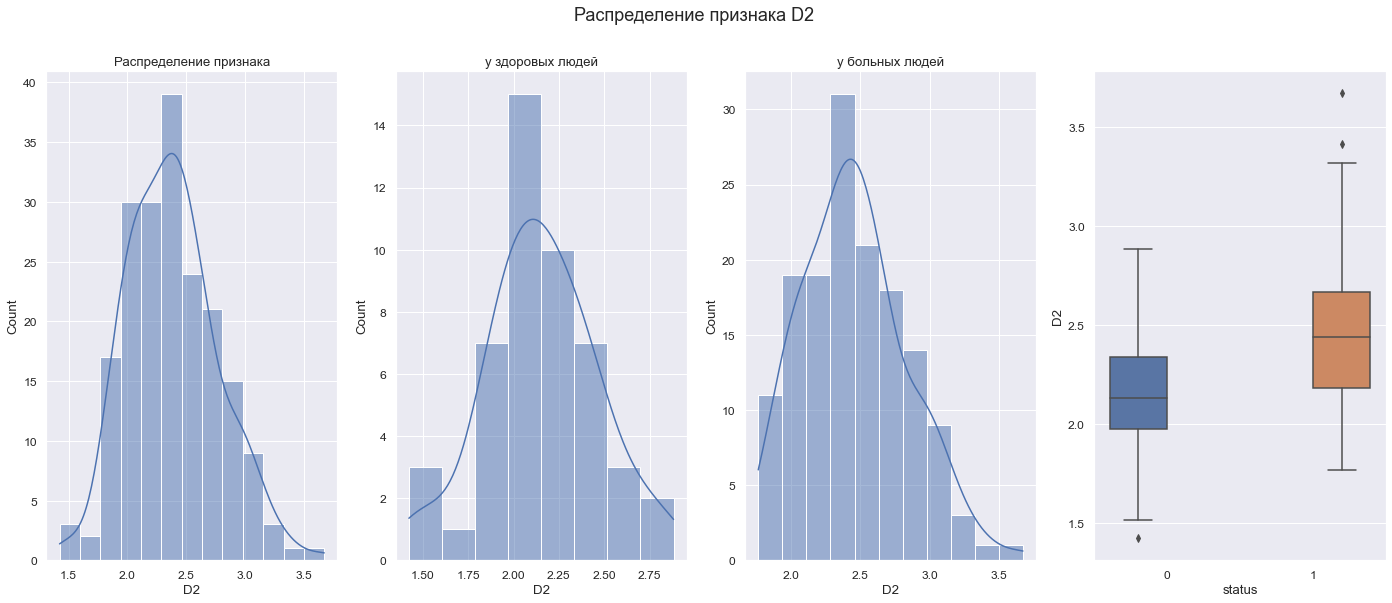

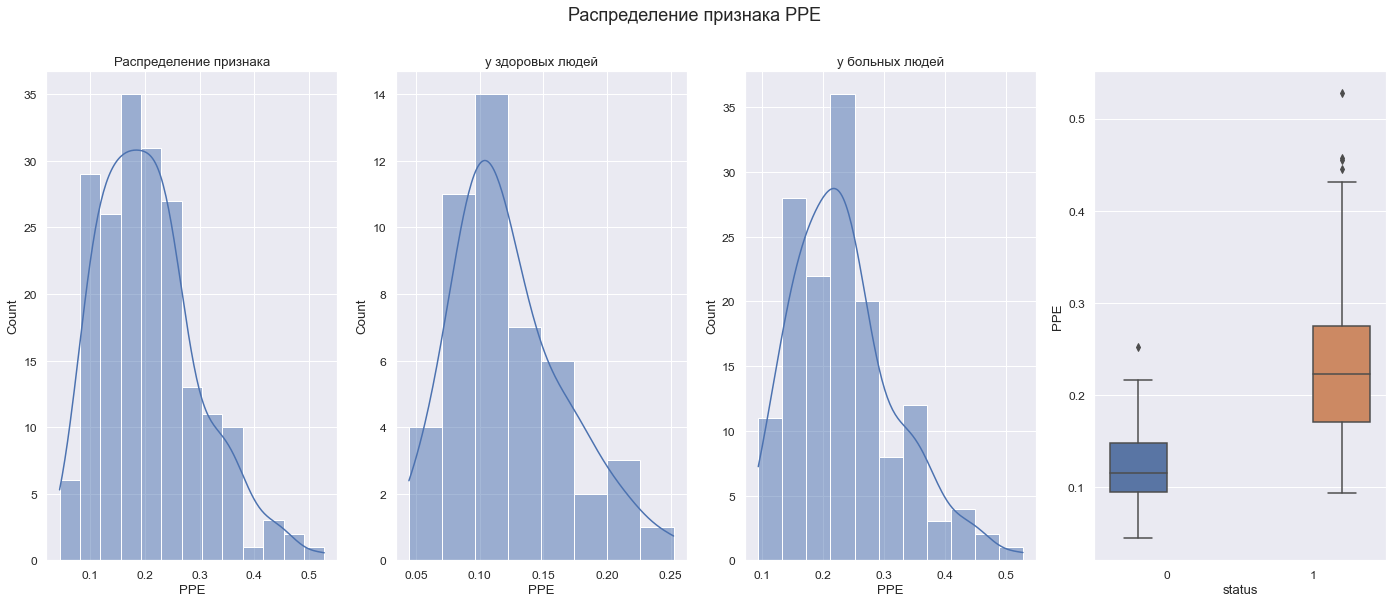

In [66]:
# Удаление признака name, потому что он содержит id заболевших и status, который
# 	представлен метками класса 0/1
for col in park_df.columns.drop(["name", "status"]):
	# Использование дефолтного стиля
	sns.set_style()
	# Увеличение размера текста
	sns.set(font_scale = 1.1)
	# Создание фигуры для 3 графиков, с указанием размеры фигуры через figsize
	fig, axes = plt.subplots(1, 4, figsize=(24, 9))
	# Заголовок фигуры
	fig.suptitle(f"Распределение признака {col}", fontsize=18)

	# Гистограмма для признака
	sns.histplot(data=park_df, x=col, kde=True,
				 ax=axes[0]).set_title(f"Распределение признака")

	# Гистограмма для признака, здоровые люди
	sns.histplot(data=park_df, x=park_df[col].loc[park_df.status == 0],
	             kde=True,
				 ax=axes[1]).set_title(f"у здоровых людей")

	# Гистограмма для признака, люди с заболеванием
	sns.histplot(data=park_df, x=park_df[col].loc[park_df.status == 1],
	             kde=True,
				 ax=axes[2]).set_title("у больных людей")

	# Коробчатая диаграмма
	sns.boxplot(data=park_df, x="status", y=park_df[col],
				hue="status", ax=axes[3])
	# Удаление легенды для коробчатой диграммы
	axes[3].legend().remove()

In [67]:
diffence_btw_0_1

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
mean,-36.757009,-35.195287,-38.313734,0.003123,0.000027,0.001832,0.001844,0.005497,0.016043,0.158246,0.008172,0.009776,0.014296,0.024516,0.017728,-3.704702,0.074264,0.029692,1.425844,0.087841,0.301567,0.110811
std,-20.383017,-8.387887,-26.482713,0.003185,0.000022,0.002175,0.002054,0.006524,0.014426,0.149976,0.007341,0.009616,0.014237,0.022023,0.025359,0.904602,0.009055,0.003440,0.328011,0.014827,0.065473,0.039451
min,-22.406000,-11.452000,-8.811000,-0.000100,0.000003,-0.000240,-0.000140,-0.000720,0.000680,0.005000,-0.000130,-0.000360,0.000920,-0.000390,0.001660,-9.442000,0.007084,-0.052428,0.844059,0.057138,0.342670,0.048654
25%,-3.375500,-5.636750,-17.368250,0.001350,0.000020,0.000698,0.000710,0.002087,0.003820,0.039000,0.001785,0.002383,0.004320,0.005340,0.004258,-4.211250,0.066938,0.031277,1.219365,0.078884,0.206716,0.075445
50%,-53.822000,-67.826500,-14.168500,0.002085,0.000015,0.001215,0.001365,0.003655,0.011675,0.109000,0.006065,0.006275,0.008555,0.018180,0.011755,-3.583000,0.095162,0.044125,1.386408,0.073519,0.310087,0.107597
75%,-59.006000,-44.078750,-69.943000,0.003140,0.000030,0.002192,0.002132,0.006575,0.022315,0.205250,0.011303,0.012955,0.018880,0.033915,0.018748,-1.974750,0.096826,0.022583,1.686079,0.109895,0.328992,0.126636
max,-36.744000,-3.512000,-40.150000,0.019560,0.000180,0.015200,0.013940,0.045600,0.078210,0.897000,0.033110,0.054420,0.110330,0.099340,0.207670,-3.119000,0.021309,0.039574,2.764833,0.158539,0.788705,0.274963


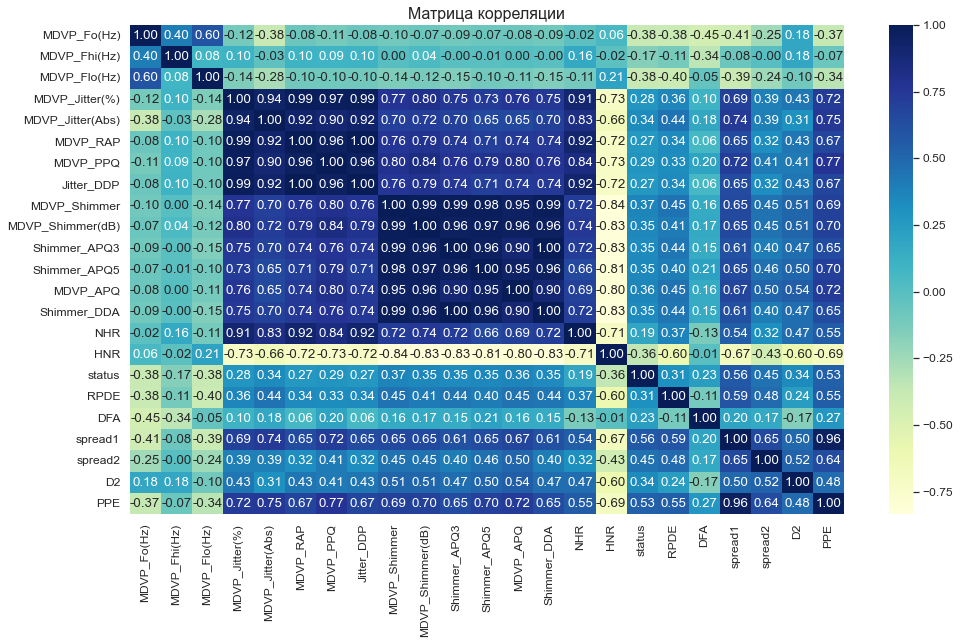

In [113]:
plt.subplots(figsize=(16, 9))
sns.heatmap(park_df.corr(), annot=True,
			fmt=".2f", cmap="YlGnBu")
plt.title("Матрица корреляции", fontsize=16);

<h3> Промежуточный вывод </h3>

<li> У здоровых людей выше показатели частот и HNR </li>
<li> Все остальные показатели выше у больных людей </li>
<li> Признаки MDVP_Jitter(%), MDVP_Jitter(Abs), MDVP_RAP, MDVP_PPQ, Jitter_DDP, MDVP_Shimmer, MDVP_Shimmer(dB), Shimmer_APQ3, Shimmer_APQ5,MDVP_APQ, Shimmer_DDA имеют очень высокую коррелированность  </li>
<li> HNR имеет отрицательную корреляцию с большинством признаков </li>

<h3> Оценим вклад каждого признака, обучив случайный лес <h3?

In [117]:
rf = RandomForestClassifier()
# Признаки, исключили name - уникальные индитификатор, status - метки классов
X = park_df.drop(["name", "status"], axis=1)
# Метки классов
y = park_df["status"]

# Обучение модели
rf.fit(X, y)
# Получение важности каждого признака после обучения леса
feature_importances = rf.feature_importances_
# Замена индексов, представленных цифрами, на названия признаков
index_changer = dict(
	zip(range(0, 22), park_df.columns.drop(["name", "status"])))
# Создание датафрейма
importances_df = pd.DataFrame(feature_importances,
							  index=park_df.columns.drop(["name", "status"]),
							  columns=["feature_importances"])
importances_df

,feature_importances
MDVP_Fo(Hz),0.097326
MDVP_Fhi(Hz),0.047851
MDVP_Flo(Hz),0.049386
MDVP_Jitter(%),0.022960
MDVP_Jitter(Abs),0.027191
MDVP_RAP,0.048607
MDVP_PPQ,0.020974
Jitter_DDP,0.041207
MDVP_Shimmer,0.024539
MDVP_Shimmer(dB),0.030674


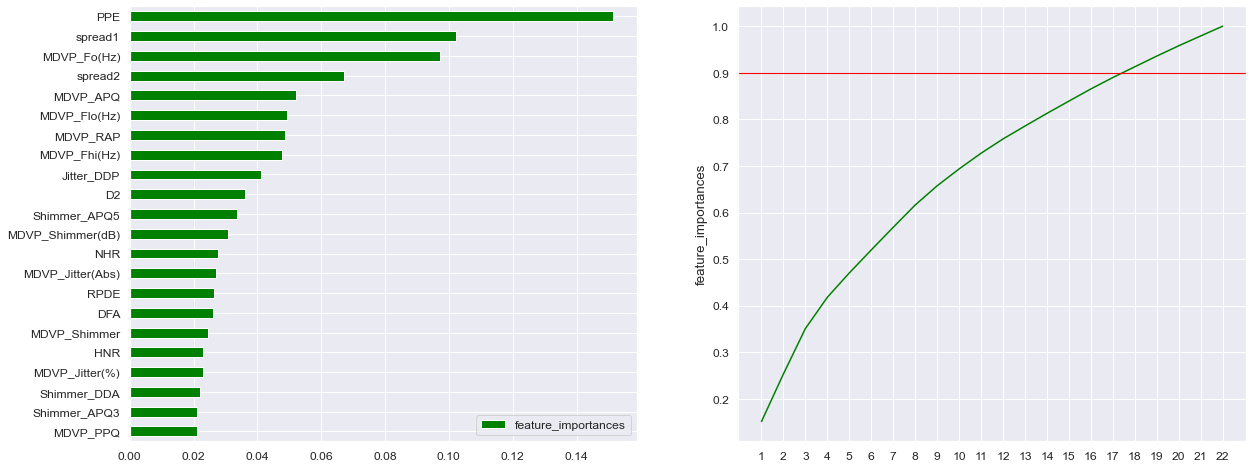

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Диграмма важности каждого признака
importances_df.sort_values(by="feature_importances").plot(kind="barh",
														  color="green",
														  ax=axes[0]);

# Настройка частоты меток на осях X и Y
axes[1].set_xticks(ticks=list(range(1, len(importances_df)+1)))
axes[1].set_yticks(ticks=np.linspace(0.0, 1.0, 11))
# График кумулятивной суммы в зависимости от числа переменных
sns.lineplot(data=importances_df, x=list(range(1, len(importances_df)+1)),
			 y=importances_df["feature_importances"].sort_values(ascending=False).cumsum(),
			 color="green", ax=axes[1])
axes[1].axhline(0.9, c='red', linewidth=1.1);

<li> <h6> spread1 и PPE имеют практически равную корреляцию с признаками, как и признаки MDVP_Jitter(%), MDVP_Jitter(Abs), MDVP_RAP, MDVP_PPQ, Jitter_DDP, MDVP_Shimmer, MDVP_Shimmer(dB), Shimmer_APQ3, Shimmer_APQ5,MDVP_APQ, Shimmer_DDA, которые показали достаточно низкий и практически одинаковый вклад в важность </h6> </li>
<li> <h6> По результатам оценки важности переменных с помощью случайного леса, для достижения 90% порога значимости признаков нужно использовать 18 переменных из 22. Возможно, это количество можно уменьшить </h6> </li>

<h5> Изобразим данные, понизив размерность с помощью алгоритма tsne</h5>

In [224]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
				  init='random').fit_transform(X)
tsne_x = np.hstack((X_embedded, np.array(park_df["status"]).reshape(-1, 1)))
# Построение диаграммы

px.scatter(tsne_x, x=tsne_x[:, 0], y=tsne_x[:, 1], color=tsne_x[:, 2],
		   width=700, height=700)\
	.update_traces(marker=dict(size=12,
							   line=dict(width=2,
										 color='yellowgreen')),
				   selector=dict(mode='markers'))

<h1 style="color: #FF69B4"><i>2. Modeling</h1>

<h3><i> Logistic Regression </i></h3>
<h6> Обучим модель логистической регрессии изначально на полных данных, а затем на 17 наиболее значимых признаках, посмотрим, какие признаки считаются значимыми и можно ли сократить признаковое пространство. Для обучения будут использованы данные (X_train, y_train), для проверки модели (X_test, y_test), для результирующей модели будет применен набор данных (X_valid, y_valid)</h6>

In [290]:
# Копия исходного датафрейма, над ней будут произведены преобразования
copy_df = park_df.copy()
# Сделаем тренировочную,испытательную и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,
													train_size=0.75)
X_new = SelectKBest(k=17).fit_transform(X, y)
X_reduced_train, X_reduced_test, \
 y_reduced_train, y_reduced_test = train_test_split(X, y, train_size=0.75)

In [291]:
# Логистическая модель
lr_1 = LogisticRegression()
# Размешиваем нашу выборку
shuffle_split = ShuffleSplit(test_size=.25, train_size=.75, n_splits=10)
# Кроссвалидация с 10 блоками на полных данных
full_cross_val_lr = cross_val_score(lr_1, X, y, cv=shuffle_split)

# Кроссвалидация на данных с меньшим количеством признаков
# Создадим новую модель
lr_2 = LogisticRegression()
reduced_cross_val_lr = cross_val_score(lr_2, X_new, y, scoring="recall",
									   cv=shuffle_split)
# Построение столбчатой диаграммы
px.bar(x=["Full Data", "Reduced Data"],
			y=[full_cross_val_lr.mean(), reduced_cross_val_lr.mean()])\
	.update_layout(width=500)


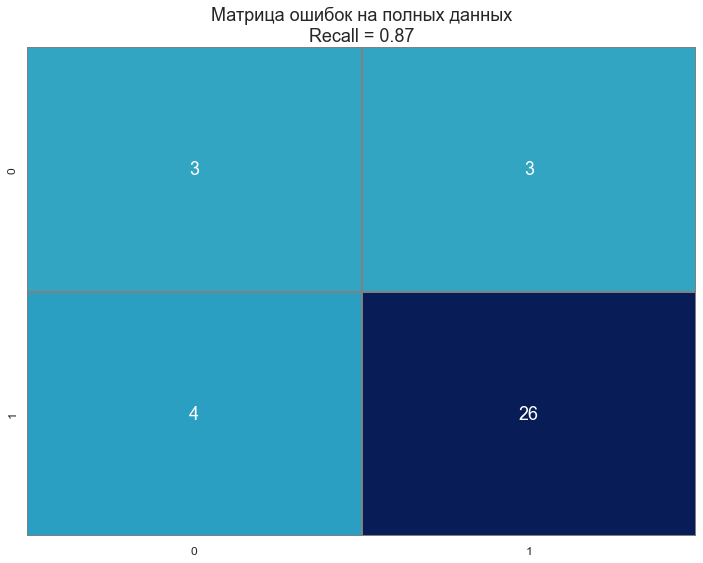

In [308]:
# Обучим и предскажем метки классов
y_pred_lr = lr_1.fit(X_train, y_train).predict(X_test)
# Матрица ошибок
plt.subplots(figsize=(12, 9))
plt.title(f"Матрица ошибок на полных данных\nRecall = "
		  f"{recall_score(y_test, y_pred_lr):.2f}", fontsize=18)
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
			fmt=".0f", cbar=False,
			cmap="YlGnBu", center=0, annot=True,
			linewidths=0.1, linecolor='gray',
			annot_kws={"size": 18});

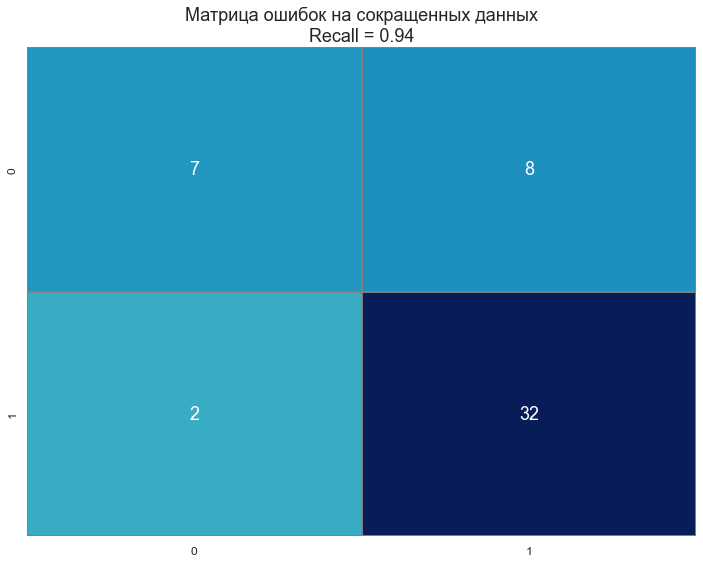

In [309]:
# Обучим и предскажем метки классов
lr_3 = LogisticRegression()
y_pred_reduced_lr = lr_2.fit(X_reduced_train, y_reduced_train)\
	.predict(X_reduced_test)
# Матрица ошибок
plt.subplots(figsize=(12, 9))
plt.title(f"Матрица ошибок на сокращенных данных\nRecall = "
		  f"{recall_score(y_reduced_test, y_pred_reduced_lr):.2f}", fontsize=18)
sns.heatmap(confusion_matrix(y_reduced_test, y_pred_reduced_lr),
			fmt=".0f", cbar=False,
			cmap="YlGnBu", center=0, annot=True,
			linewidths=0.1, linecolor='gray',
			annot_kws={"size": 18});

<h6>Логистическая модель предсказывает метку 0 от 0 до 4 раз на разреженных данных. Она требует настройки </h6>

<h3><i>Random Forest</i></h3>

In [305]:
# Модель случайного леса
rf_1 = RandomForestClassifier()
full_cross_val_rf  = cross_val_score(rf_1, X, y, cv=shuffle_split)
# Кроссвалидация на данных с меньшим количеством признаков
# Создадим новую модель
rf_2 = RandomForestClassifier()
reduced_cross_val_rf = cross_val_score(rf_2, X_new, y, scoring="recall",
									   cv=shuffle_split)
# Построение столбчатой диаграммы
px.bar(x=["Full Data", "Reduced Data"],
	   y=[full_cross_val_rf.mean(), reduced_cross_val_rf.mean()],
	   title=f"Результаты валидации с 10 блоками").update_layout(width=500)

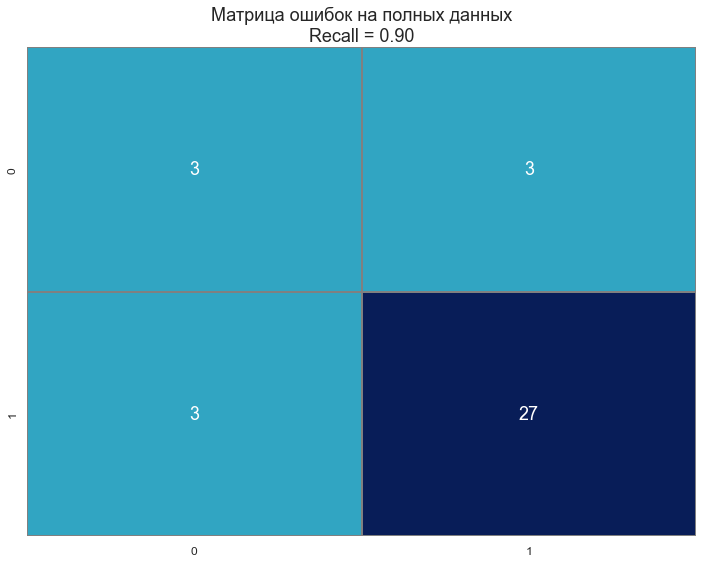

In [312]:
# Обучим и предскажем метки классов
y_pred_rf = rf_1.fit(X_train, y_train).predict(X_test)
# Матрица ошибок
plt.subplots(figsize=(12, 9))
plt.title(f"Матрица ошибок на полных данных\nRecall = "
		  f"{recall_score(y_test, y_pred_rf):.2f}", fontsize=18)
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
			fmt=".0f", cbar=False,
			cmap="YlGnBu", center=0, annot=True,
			linewidths=0.1, linecolor='gray',
			annot_kws={"size": 18});

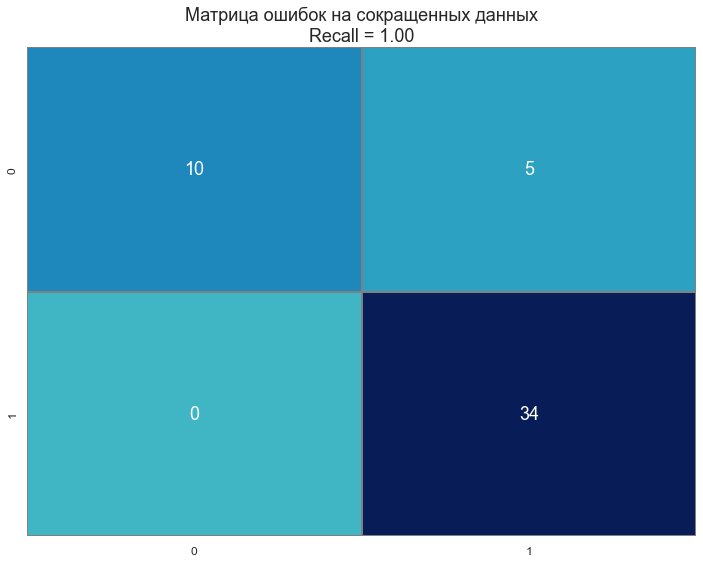

In [311]:
# Обучим и предскажем метки классов
y_pred_reduced_rf = rf_2.fit(X_reduced_train, y_reduced_train)\
	.predict(X_reduced_test)
# Матрица ошибок
plt.subplots(figsize=(12, 9))
plt.title(f"Матрица ошибок на сокращенных данных\nRecall = "
		  f"{recall_score(y_reduced_test, y_pred_reduced_rf):.2f}", fontsize=18)
sns.heatmap(confusion_matrix(y_reduced_test, y_pred_reduced_rf),
			fmt=".0f", cbar=False,
			cmap="YlGnBu", center=0, annot=True,
			linewidths=0.1, linecolor='gray',
			annot_kws={"size": 18});

<h3><i>SVM</i></h3>
<p> Первоначально будет проверена эффективность линейного метода опорных векторов, затем при необходимости будет применен ядерный трюк с подбором ядра и гиперпараметров <p>
<p> Для линейного метода необходима стандартизация признаков, потому что метода работает с расстояними в признаковом пространстве.
Ниже создается контейнер, в котором сначала производится стандартизация значений, а затем данные будут переданы в алгоритм.</p>

In [442]:
# Создание контейнера
linear_svc = make_pipeline(StandardScaler(), LinearSVC())
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
cross_val_score(linear_svc, X, y, scoring="recall",
								cv=shuffle_split).mean()

0.9027528622269827

In [443]:
cross_val_score(linear_svc, X_new, y, scoring="recall",
				cv=shuffle_split).mean()

0.9286534436483969

<h6> Настроим гиперпараметры метода опорных векторов<br>
Первоначально примением случайный поиск, затем решетчатый для нахождения примерного диапазона хорошего значения для гиперпараметра. С помощью решетчатого поиска произведем уточнение<br>Но для начала нужно узнать названия параметров в контейнере:</h6>

In [386]:
linear_svc.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('linearsvc', LinearSVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearsvc__C': 1.0,
 'linearsvc__class_weight': None,
 'linearsvc__dual': True,
 'linearsvc__fit_intercept': True,
 'linearsvc__intercept_scaling': 1,
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__max_iter': 1000,
 'linearsvc__multi_class': 'ovr',
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': None,
 'linearsvc__tol': 0.0001,
 'linearsvc__verbose': 0}

In [421]:
# Параметры для случайного поиска
randomized_params = dict(linearsvc__C=np.linspace(10e-6, 10000, 20),
						 linearsvc__penalty=["l1", "l2"],
						 linearsvc__max_iter=list(range(250, 1500, 250)))
# Рандомизированный поиск
rs = RandomizedSearchCV(linear_svc, randomized_params, n_jobs=4,
						random_state=42)
rs.fit(X, y);

In [448]:
y_linear_svc_pred = rs.best_estimator_.fit(X_reduced_train, y_reduced_train).predict(X_reduced_test)

In [449]:
recall_score(y_reduced_test, y_linear_svc_pred)

0.9411764705882353

<h3><i> Kernel SVC </i></h3>

In [450]:
kernel_svc = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
cross_val_score(kernel_svc, X_new, y,
				scoring="recall",
				cv=shuffle_split).mean()

0.9840478294425663

<h1 style="color: #FF69B4"><i>4. Попытка улучшить результат, с помощью дополнительной обработки данных</h1>

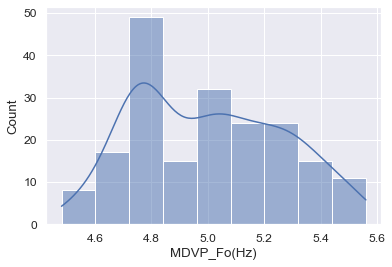

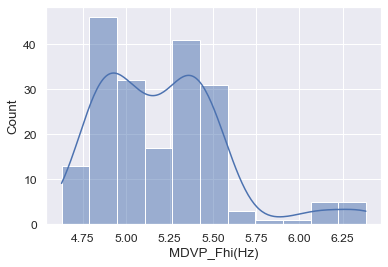

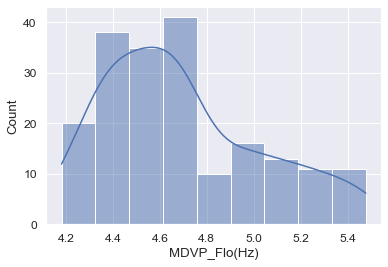

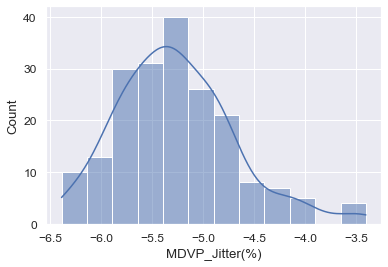

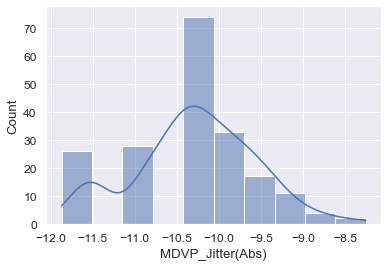

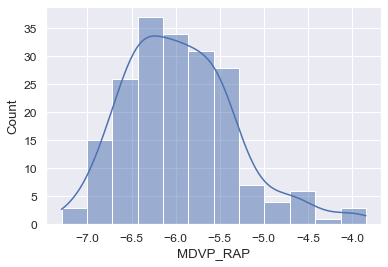

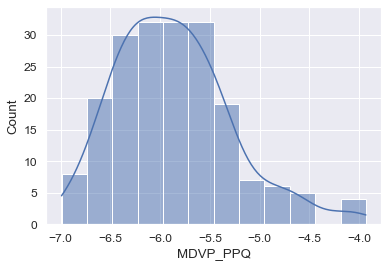

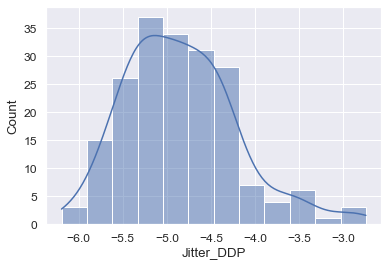

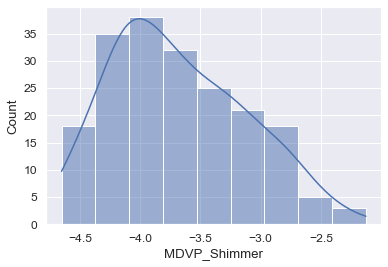

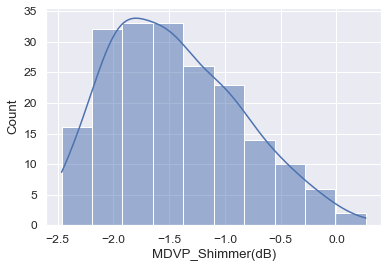

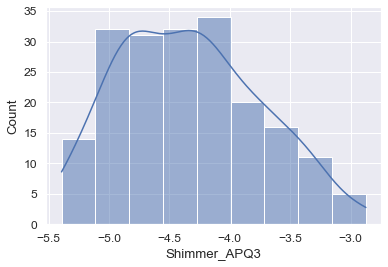

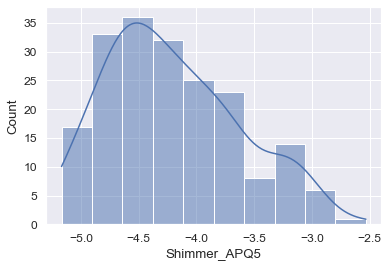

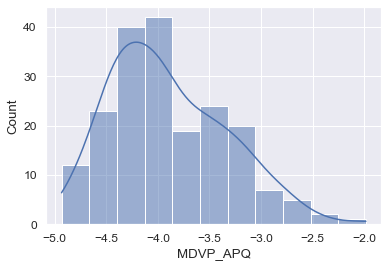

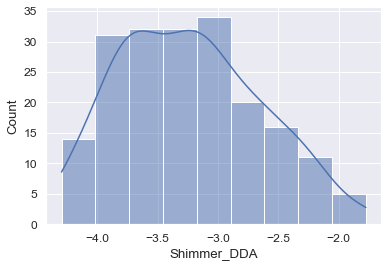

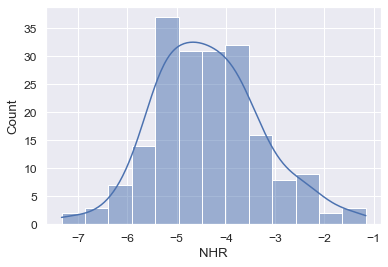

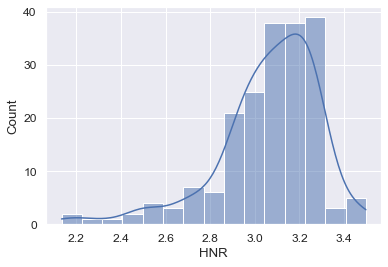

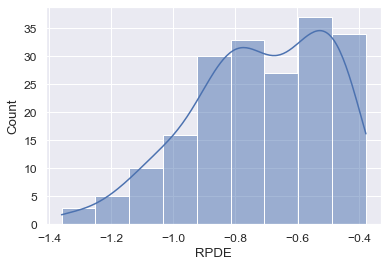

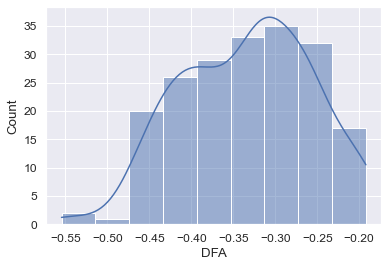

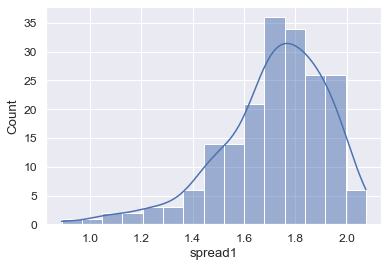

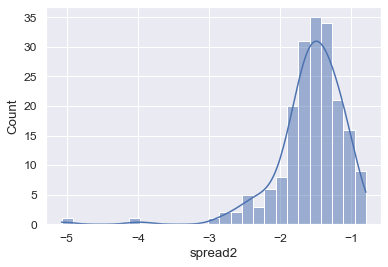

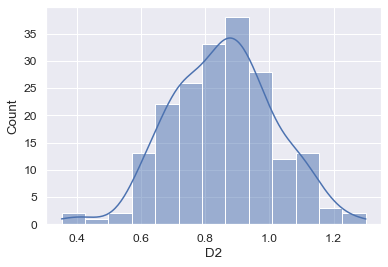

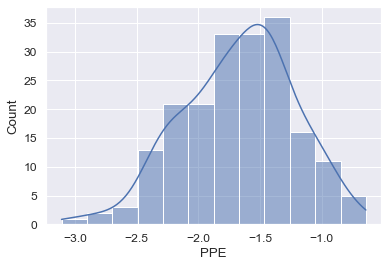

In [474]:
copy_df = park_df.copy()
for col in copy_df.columns.drop(["name", "status"]):
	if col == "spread1":
		copy_df[col] = np.log(np.abs(copy_df["spread1"]))
	else:
		copy_df[col] = np.log(copy_df[col])

	plt.figure()
	sns.histplot(data=park_df,x= copy_df[col], kde=True)


<h6> Из-за того, что признак spread1 отрицателен, из него нельзя вычислить логарифм. Из него будет взят модуль </h6>

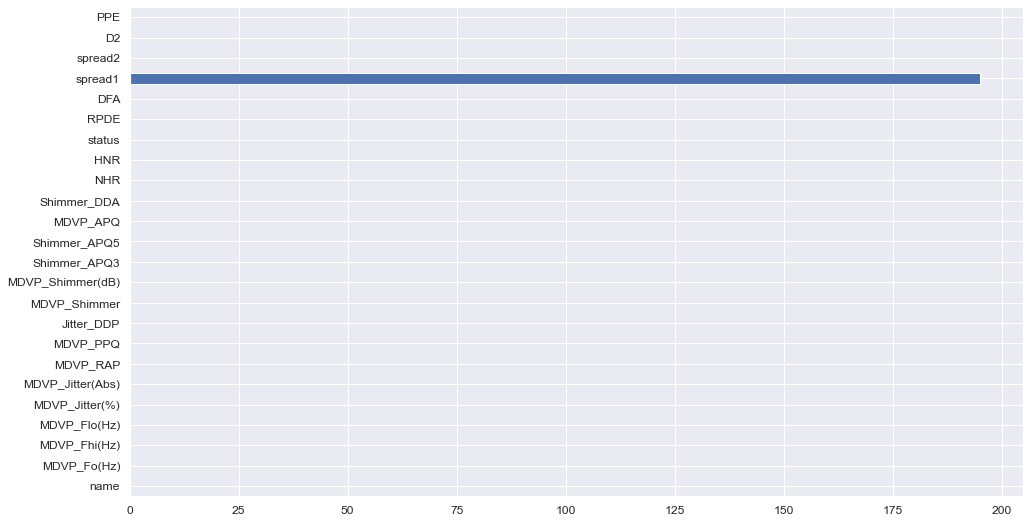

In [462]:
copy_df.isna().sum().plot(kind="barh", figsize=(16, 9));

<h6> Оценим важность признаков, чтобы понять, как повлияло выравнивание данных </h6>

In [476]:
# Признаки
X_log = copy_df.drop(["name", "status"], axis=1)
rf.fit(X_log, y)
pd.DataFrame(rf.feature_importances_,
			 index=park_df.columns.drop(["name", "status"]),
			 columns=["feature_importances"])

,feature_importances
MDVP_Fo(Hz),0.091906
MDVP_Fhi(Hz),0.058222
MDVP_Flo(Hz),0.059570
MDVP_Jitter(%),0.038676
MDVP_Jitter(Abs),0.019744
MDVP_RAP,0.032442
MDVP_PPQ,0.025396
Jitter_DDP,0.034057
MDVP_Shimmer,0.020707
MDVP_Shimmer(dB),0.018406


<h4><b> Kernel SVM </b></h4>

In [479]:
cross_val_score(kernel_svc, X_log, y,
				scoring="recall",
				cv=shuffle_split).mean()

0.9852372623269652

<h4><b> Logistic Regression </b></h4>

In [483]:
cross_val_score(lr_2, X_log, y, scoring="recall",
				cv=shuffle_split).mean()

0.9444953649241317